In [77]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import time

In [78]:
class cell:
    def __init__(self,x,y): 
        self.x = x 
        self.y = y 
        self.blocked = False 
        self.g = 0 
        self.h = 0 
        self.f = 0 
        
    #def __lt__(self,new:cell):
        #if(self.f != new.f):
            #return self.f < new.f
        #else:
            #return self.g > new.g
        
    def set_h_value(self, g_x, g_y):
        self.h = abs(g_x - self.x) + abs(g_y - self.y)
        self.f = self.g + self.h
        
class g_world:
    def __init__(self,prob,d):
        self.prob = prob 
        self.d = d
        
    def generate_world(self,mat):
        for i in range(self.d): 
            a = [] 
            for j in range(self.d): 
                c = cell(i,j) 
                chnc = random.uniform(0,1) 
                if i == 0 and j == 0: 
                    a.append(c)
                    continue
                if i == self.d-1 and j == self.d-1: 
                    a.append(c)
                    continue
                if(chnc <= self.prob):
                    c.blocked = True
                        
                a.append(c) 
            mat.append(a) 
        return mat
    
def genv(prob, d):
        temp = g_world(prob, d)
        grid = temp.generate_world([])
        return grid
    
def display(grid):
    l = []
    for i in range(len(grid)):
        a = []
        for j in range(len(grid)):
            if grid[i][j].blocked:
                a.append('x')
            else:
                a.append(' ')
        l.append(a)
    f = len(l)
    l[0][0] = 'S'
    l[f-1][f-1] = 'G'
    return l

    g_out= display(grid)

    output: str = ""
    for row in g_out:
        output += " ".join([c for c in row]) + "\n"
    print(output)

In [79]:
def display_backward(grid):
    l = []
    for i in range(len(grid)):
        a = []
        for j in range(len(grid)):
            if grid[i][j].blocked:
                a.append('x')
            else:
                a.append(' ')
        l.append(a)
    f = len(l)
    l[0][0] = 'G'
    l[f-1][f-1] = 'S'
    return l

    g_out = display(grid)

    output: str = ""
    for row in g_out:
        output += " ".join([c for c in row]) + "\n"
    print(output)

In [80]:
import heapq as hq
def Astar(grid,sind,gind):
    counter = 0
    clashes = 0 
    scell = grid[sind[0]][sind[1]]
    gcell = grid[gind[0]][gind[1]] 
    open_list = [] 
    hq.heapify(open_list)
    close_list = set() 
    parent_dict = {} 
    visited = set() 
    scell.g = 0 
    scell.set_h_value(gind[0], gind[1])
    hq.heappush(open_list,(scell.f, scell.h, (scell.x, scell.y))) 
    visited.add((scell.x, scell.y))
    while len(open_list)>0:
        mpc = hq.heappop(open_list)
        currcell = grid[mpc[-1][0]][mpc[-1][1]]  
        counter += 1
        close_list.add((currcell.x, currcell.y))
        if currcell == gcell: 
            path = []
            curr = currcell
            while (curr.x, curr.y) != (sind[0], sind[1]):
                path.append([curr.x, curr.y])
                curr = parent_dict[(curr.x, curr.y)]
            path.append([curr.x,curr.y])
            return path[::-1], counter, clashes
        
        nextgen = [] 
        for new_position in [(0,1),(0,-1),(1,0),(-1,0)]:
            locofnode = (currcell.x+new_position[0], currcell.y+new_position[1]) 
            if(locofnode[0] > len(grid)-1 or locofnode[1] > len(grid)-1 or locofnode[0] < 0 or locofnode[1] < 0):
                continue
            if(grid[locofnode[0]][locofnode[1]].blocked):
                continue
            if((locofnode[0], locofnode[1]) in close_list):
                continue
            if((locofnode[0], locofnode[1]) in visited):
                if currcell.g + 1 + grid[locofnode[0]][locofnode[1]].h < grid[locofnode[0]][locofnode[1]].f:
                    clashes += 1 
                    open_list.remove((grid[locofnode[0]][locofnode[1]].f, grid[locofnode[0]][locofnode[1]].h, (grid[locofnode[0]][locofnode[1]].x, grid[locofnode[0]][locofnode[1]].y)))
                    hq.heapify(open_list)
                    grid[locofnode[0]][locofnode[1]].g = currcell.g+1
                    grid[locofnode[0]][locofnode[1]].set_h_value(gind[0], gind[1])
                    hq.heappush(open_list,(grid[locofnode[0]][locofnode[1]].f, grid[locofnode[0]][locofnode[1]].h, (grid[locofnode[0]][locofnode[1]].x, grid[locofnode[0]][locofnode[1]].y)))
                    parent_dict[(locofnode[0],locofnode[1])] = currcell
            else:
                grid[locofnode[0]][locofnode[1]].g = currcell.g + 1
                grid[locofnode[0]][locofnode[1]].set_h_value(gind[0], gind[1])
                nextgen.append(grid[locofnode[0]][locofnode[1]])
                parent_dict[(locofnode[0],locofnode[1])] = currcell
        if(nextgen == []):
            continue
        for child in nextgen:
            hq.heappush(open_list,(child.f,child.h, (child.x, child.y)))
            visited.add((child.x, child.y))
    
    return [], 0, 0

In [81]:
grid = genv(0.3,101)

In [82]:
Astar(grid,[0,0],[100,100])

([[0, 0],
  [1, 0],
  [2, 0],
  [3, 0],
  [4, 0],
  [5, 0],
  [6, 0],
  [7, 0],
  [7, 1],
  [8, 1],
  [8, 2],
  [9, 2],
  [10, 2],
  [11, 2],
  [12, 2],
  [12, 3],
  [12, 4],
  [13, 4],
  [13, 5],
  [14, 5],
  [15, 5],
  [15, 6],
  [16, 6],
  [17, 6],
  [18, 6],
  [19, 6],
  [20, 6],
  [21, 6],
  [21, 7],
  [21, 8],
  [21, 9],
  [21, 10],
  [21, 11],
  [22, 11],
  [23, 11],
  [24, 11],
  [25, 11],
  [26, 11],
  [27, 11],
  [28, 11],
  [29, 11],
  [29, 12],
  [30, 12],
  [30, 13],
  [30, 14],
  [31, 14],
  [32, 14],
  [33, 14],
  [34, 14],
  [35, 14],
  [36, 14],
  [37, 14],
  [37, 15],
  [37, 16],
  [37, 17],
  [38, 17],
  [38, 18],
  [39, 18],
  [40, 18],
  [41, 18],
  [41, 19],
  [41, 20],
  [42, 20],
  [42, 21],
  [42, 22],
  [43, 22],
  [43, 23],
  [44, 23],
  [45, 23],
  [45, 24],
  [45, 25],
  [45, 26],
  [45, 27],
  [45, 28],
  [45, 29],
  [46, 29],
  [46, 30],
  [47, 30],
  [47, 31],
  [48, 31],
  [49, 31],
  [49, 32],
  [50, 32],
  [50, 33],
  [50, 34],
  [51, 34],
  [51, 35],

In [83]:
def explore_path(path,environ ,grid, final_discovered_grid_world):
    for i in range(len(path)): 
        x = path[i][0] 
        y = path[i][1] 
        
        environ[x][y].x = grid[x][y].x
        environ[x][y].y = grid[x][y].y
        environ[x][y].blocked = grid[x][y].blocked
        
        final_discovered_grid_world[x][y].x = grid[x][y].x
        final_discovered_grid_world[x][y].y = grid[x][y].y
        final_discovered_grid_world[x][y].blocked = grid[x][y].blocked
        
        if(grid[x][y].blocked): 
            return path[:i]
        
        for new_position in [(0,1),(0,-1),(1,0),(-1,0)]: 
            locofnode = (x+new_position[0], y+new_position[1])
            if(locofnode[0] > len(grid)-1 or locofnode[1] > len(grid)-1 or locofnode[0] < 0 or locofnode[1] < 0):
                
                continue
            
            environ[locofnode[0]][locofnode[1]].x = grid[locofnode[0]][locofnode[1]].x
            environ[locofnode[0]][locofnode[1]].y = grid[locofnode[0]][locofnode[1]].y
            environ[locofnode[0]][locofnode[1]].blocked = grid[locofnode[0]][locofnode[1]].blocked
            final_discovered_grid_world[locofnode[0]][locofnode[1]].x = grid[locofnode[0]][locofnode[1]].x
            final_discovered_grid_world[locofnode[0]][locofnode[1]].y = grid[locofnode[0]][locofnode[1]].y
            final_discovered_grid_world[locofnode[0]][locofnode[1]].blocked = grid[locofnode[0]][locofnode[1]].blocked
    return path

In [84]:
def repeated_astar(environ, rwgrid, sind, gind, final_discovered_grid_world, limited_view = False, imp = False, backward = 0):
    paths = [] 
    cp = 0  
    added_cost = 0   
    while(1):
        if (backward == 1):
            path, counter, n_c = Astar(environ, gind, sind) 
        else:
            path, counter, n_c = Astar(environ, sind, gind)
        cp += counter 
        if(path == []): 
            print("Maze is not solveable")
            break
        else:  
            if imp:   
                p, last_ind_with_option = explore_path_with_imp(path,environ,rwgrid, final_discovered_grid_world)
            if not limited_view: 
                p = explore_path(path,environ,rwgrid, final_discovered_grid_world)
            if (backward == 1):
                p = explore_path(path[::-1], environ, rwgrid, final_discovered_grid_world)
            else:
                p = explore_path_with_limited_view(path,environ,rwgrid, final_discovered_grid_world) 
            paths.append(p) 
            if p[-1] == gind: 
                if imp:
                    return paths, cp, added_cost
                else:
                    return paths, cp
            else:    
                if imp:   
                    sind = last_ind_with_option
                    for i in range(len(p)):
                        if p[i] == last_ind_with_option:
                            added_cost += len(p)-1-i
                            break
                else:     
                    sind = p[-1]

In [85]:
rwgrid1 = []
for mazechoice in range(50):
    rwgrid1.append(genv(0.3,101))
rwgrid = random.choice(rwgrid1)

In [86]:
def explore_path_with_limited_view(path,environ ,grid, final_discovered_grid_world):
    for i in range(len(path)): 
        x = path[i][0] 
        y = path[i][1]  
        environ[x][y].x = grid[x][y].x 
        environ[x][y].y = grid[x][y].y
        environ[x][y].blocked = grid[x][y].blocked
        final_discovered_grid_world[x][y].x = grid[x][y].x
        final_discovered_grid_world[x][y].y = grid[x][y].y
        final_discovered_grid_world[x][y].blocked = grid[x][y].blocked
        
        if(grid[x][y].blocked): 
            return path[:i]
    
    return path

In [87]:
environ = genv(0,101)
final_discovered_grid_world = genv(1,101)

In [88]:
 def explore_path_with_imp(path,environ ,grid, final_discovered_grid_world):
    last_ind_with_option = [0,0] 
    for i in range(len(path)): 
        
        x = path[i][0]  
        y = path[i][1]   
        environ[x][y].x = grid[x][y].x  
        environ[x][y].y = grid[x][y].y
        environ[x][y].blocked = grid[x][y].blocked
        final_discovered_grid_world[x][y].x = grid[x][y].x
        final_discovered_grid_world[x][y].y = grid[x][y].y
        final_discovered_grid_world[x][y].blocked = grid[x][y].blocked
        
        if(grid[x][y].blocked):
            return path[:i], last_ind_with_option

        for new_position in [(0,1),(0,-1),(1,0),(-1,0)]:  

            locofnode = (x+new_position[0], y+new_position[1])
            if(locofnode[0] > len(grid)-1 or locofnode[1] > len(grid)-1 or locofnode[0] < 0 or locofnode[1] < 0):
                continue
            environ[locofnode[0]][locofnode[1]].x = grid[locofnode[0]][locofnode[1]].x
            environ[locofnode[0]][locofnode[1]].y = grid[locofnode[0]][locofnode[1]].y
            environ[locofnode[0]][locofnode[1]].blocked = grid[locofnode[0]][locofnode[1]].blocked
            final_discovered_grid_world[locofnode[0]][locofnode[1]].x = grid[locofnode[0]][locofnode[1]].x
            final_discovered_grid_world[locofnode[0]][locofnode[1]].y = grid[locofnode[0]][locofnode[1]].y
            final_discovered_grid_world[locofnode[0]][locofnode[1]].blocked = grid[locofnode[0]][locofnode[1]].blocked
            
            if i-1 > 0: 
                if (locofnode[0] == path[i-1][0] and locofnode[1] == path[i-1][1]):
                    continue
            if i+1 < len(path): 
                if (locofnode[1] == path[i+1][0] and locofnode[1] == path[i+1][1]):
                    continue
            
            if(grid[locofnode[0]][locofnode[1]].blocked): 
                continue
            
            last_ind_with_option = [x,y] 
    return path, 0 

In [89]:
g_out = display(rwgrid)

In [90]:
import time
a = time.time()
path,cp = repeated_astar(environ, rwgrid, [0,0], [100,100], final_discovered_grid_world, False, False)
b = time.time()
path = [item for p in path for item in p]
print(path)
print(b-a)

[[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 4], [1, 4], [1, 4], [2, 4], [2, 5], [2, 6], [2, 7], [2, 8], [2, 9], [2, 10], [2, 10], [3, 10], [3, 10], [3, 9], [4, 9], [5, 9], [5, 9], [6, 9], [6, 10], [6, 11], [6, 12], [6, 12], [5, 12], [5, 13], [5, 13], [5, 12], [6, 12], [6, 11], [7, 11], [8, 11], [8, 12], [8, 13], [8, 14], [8, 15], [8, 16], [8, 17], [8, 18], [8, 19], [8, 20], [8, 21], [8, 21], [9, 21], [9, 22], [9, 23], [9, 24], [9, 24], [10, 24], [10, 24], [11, 24], [11, 25], [11, 25], [11, 24], [11, 23], [12, 23], [13, 23], [13, 24], [13, 25], [13, 26], [13, 27], [13, 27], [14, 27], [14, 28], [14, 28], [15, 28], [15, 28], [16, 28], [16, 29], [16, 29], [17, 29], [17, 30], [17, 31], [17, 32], [17, 33], [17, 34], [17, 35], [17, 36], [17, 37], [17, 37], [18, 37], [18, 38], [18, 38], [19, 38], [19, 38], [20, 38], [20, 39], [20, 39], [21, 39], [21, 40], [21, 41], [21, 42], [21, 43], [21, 44], [21, 45], [21, 46], [21, 46], [20, 46], [20, 47], [20, 48], [20, 48], [21, 48], [21, 49], [21, 50],

In [91]:
print(path)
print(len(path))

[[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 4], [1, 4], [1, 4], [2, 4], [2, 5], [2, 6], [2, 7], [2, 8], [2, 9], [2, 10], [2, 10], [3, 10], [3, 10], [3, 9], [4, 9], [5, 9], [5, 9], [6, 9], [6, 10], [6, 11], [6, 12], [6, 12], [5, 12], [5, 13], [5, 13], [5, 12], [6, 12], [6, 11], [7, 11], [8, 11], [8, 12], [8, 13], [8, 14], [8, 15], [8, 16], [8, 17], [8, 18], [8, 19], [8, 20], [8, 21], [8, 21], [9, 21], [9, 22], [9, 23], [9, 24], [9, 24], [10, 24], [10, 24], [11, 24], [11, 25], [11, 25], [11, 24], [11, 23], [12, 23], [13, 23], [13, 24], [13, 25], [13, 26], [13, 27], [13, 27], [14, 27], [14, 28], [14, 28], [15, 28], [15, 28], [16, 28], [16, 29], [16, 29], [17, 29], [17, 30], [17, 31], [17, 32], [17, 33], [17, 34], [17, 35], [17, 36], [17, 37], [17, 37], [18, 37], [18, 38], [18, 38], [19, 38], [19, 38], [20, 38], [20, 39], [20, 39], [21, 39], [21, 40], [21, 41], [21, 42], [21, 43], [21, 44], [21, 45], [21, 46], [21, 46], [20, 46], [20, 47], [20, 48], [20, 48], [21, 48], [21, 49], [21, 50],

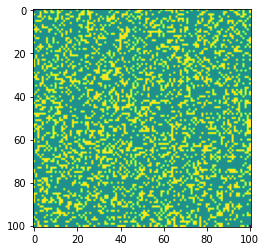

In [92]:
colours = np.ones((101, 101))
for i in range(len(g_out)):
    for j in range(len(g_out[0])):
        if g_out[i][j] == 'x':
            colours[i][j] = 2
colours[0][0], colours[-1][-1] = 0, 0
#for p in path:
    #colours[p[0]][p[1]] = 3
plt.imshow(colours)
plt.show()

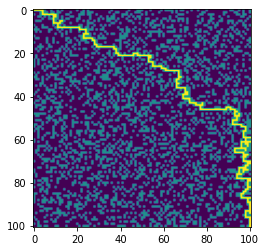

In [93]:
colours = np.ones((101, 101))
for i in range(len(g_out)):
    for j in range(len(g_out[0])):
        if g_out[i][j] == 'x':
            colours[i][j] = 2
colours[0][0], colours[-1][-1] = 0, 0
for p in path:
    colours[p[0]][p[1]] = 3
plt.imshow(colours)
plt.show()

In [94]:
#output: str = ""
#for row in grid_output:
#    output += "|".join([c for c in row]) + "\n"
#print(output)

In [95]:
c = time.time()
reverse_path,reverse_cp = repeated_astar(environ, rwgrid, [0,0], [100,100], final_discovered_grid_world, False, False,1)
d = time.time()
reverse_path = [item for p in reverse_path for item in p]
print(d-c)

0.17915892601013184


In [96]:
print(reverse_path)
print(len(reverse_path))
print(reverse_cp)

[[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [1, 4], [2, 4], [2, 5], [2, 6], [2, 7], [2, 8], [2, 9], [3, 9], [4, 9], [5, 9], [6, 9], [6, 10], [6, 11], [7, 11], [8, 11], [8, 12], [8, 13], [8, 14], [8, 15], [8, 16], [8, 17], [8, 18], [8, 19], [8, 20], [8, 21], [9, 21], [9, 22], [9, 23], [10, 23], [11, 23], [12, 23], [13, 23], [13, 24], [13, 25], [13, 26], [13, 27], [14, 27], [14, 28], [15, 28], [16, 28], [16, 29], [17, 29], [17, 30], [17, 31], [17, 32], [17, 33], [17, 34], [17, 35], [17, 36], [17, 37], [18, 37], [18, 38], [19, 38], [20, 38], [20, 39], [21, 39], [21, 40], [21, 41], [21, 42], [21, 43], [21, 44], [21, 45], [22, 45], [23, 45], [23, 45], [24, 45], [24, 46], [24, 47], [24, 48], [24, 49], [24, 50], [24, 51], [24, 52], [24, 53], [24, 54], [24, 55], [25, 55], [26, 55], [26, 56], [26, 57], [26, 58], [26, 59], [27, 59], [27, 60], [27, 61], [28, 61], [28, 62], [28, 63], [28, 64], [28, 65], [28, 66], [29, 66], [30, 66], [31, 66], [32, 66], [33, 66], [34, 66], [35, 66], [36, 66], [36, 67]

In [97]:
reverse_g_out = display_backward(rwgrid) 

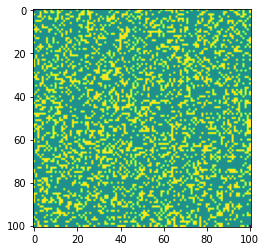

In [98]:
colours = np.ones((101, 101))
for i in range(len(reverse_g_out)):
    for j in range(len(reverse_g_out[0])):
        if reverse_g_out[i][j] == 'x':
            colours[i][j] = 2
colours[0][0], colours[-1][-1] = 0, 0
#for p in path:
    #colours[p[0]][p[1]] = 3
plt.imshow(colours)
plt.show()

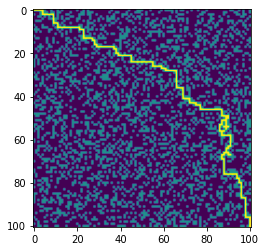

In [99]:
colours = np.ones((101, 101))
for i in range(len(reverse_g_out)):
    for j in range(len(reverse_g_out[0])):
        if reverse_g_out[i][j] == 'x':
            colours[i][j] = 2
#         elif gridoutput[i][j] == 'p':
#             colours[i][j] = 3
colours[0][0], colours[-1][-1] = 0, 0
for p in reverse_path:
    colours[p[0]][p[1]] = 3
plt.imshow(colours)
plt.show()

In [100]:
#output: str = ""
#for row in reverse_grid_output:
#    output += "|".join([c for c in row]) + "\n"
#print(output)